# Neural Network Classifier using Keras Sequential Model

### Loading required libraries

In [1]:
import pandas
import keras
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils.visualize_util import plot

Using TensorFlow backend.


### Loding the dataset

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = pandas.read_csv("final.csv",header=None)
dataset = dataframe.values
X = dataset[:,0:8].astype(float)
Y = dataset[:,8]

### Hot Encoding the output classes

In [3]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

### Model with k-Fold Cross Validation

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=6, init='normal', activation='relu'))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dense(3, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=50, batch_size=10, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

#results = cross_val_score(estimator, X, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### Simple Sequential Model without Validation

In [4]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=8,activation='relu'))
model.add(Dense(18, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(14, activation='relu'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

optimizers=['adam']

accu={}
for myoptimizer in optimizers:
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=myoptimizer, metrics=['accuracy'])

    # Fit the model
    model.fit(X, dummy_y, nb_epoch=100,verbose=0, batch_size=10)

    # evaluate the model
    scores = model.evaluate(X, dummy_y)
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    accu[myoptimizer]=scores[1]*100

2784/2785 [============================>.] - ETA: 0s  96/2785 [>.............................] - ETA: 0s

In [5]:
print accu

{'adam': 32.064631956912024}


### Model Summary

In [6]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 20)            180         dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 18)            378         dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 16)            304         dense_2[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 16)            272         dense_3[0][0]                    
___________________________________________________________________________________________

### Using the model for predictions

In [ ]:
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x) for x in predictions]
print(rounded)

### Plotting the model

In [7]:
plot(model, to_file='model.png')

### Visualizing the graph in notebook

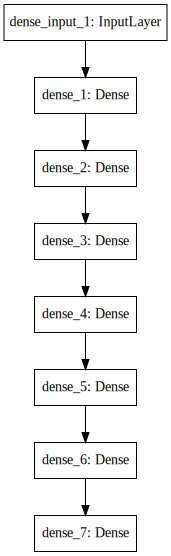

In [8]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))